In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1.Crear un entorno de anaconda con los paquetes que considere necesarios.
### 2. Usando sclicing con NumPy separar los datos en 2 datasets: 
#entrenamiento(80 %) y validaci´on y pruebas(20 %).


In [2]:
dataset = np.load('proyecto_training_data.npy')

In [3]:
dataset

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [4]:
dataset.shape

(1460, 6)

In [5]:
dataset = np.array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03, 6.50000e+01],
                [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03, 8.00000e+01],
                [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03, 6.80000e+01],
                [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03, 6.60000e+01],
                [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03, 6.80000e+01],
                [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03, 7.50000e+01]])

In [6]:
df = pd.DataFrame(dataset, columns=['colA', 'colB', 'colC', 'colD', 'colE', 'colF'])

In [7]:
print(df)

       colA  colB    colC  colD    colE  colF
0  208500.0   7.0   856.0   8.0  2003.0  65.0
1  181500.0   6.0  1262.0   6.0  1976.0  80.0
2  223500.0   7.0   920.0   6.0  2001.0  68.0
3  266500.0   7.0  1188.0   9.0  1941.0  66.0
4  142125.0   5.0  1078.0   5.0  1950.0  68.0
5  147500.0   5.0  1256.0   6.0  1965.0  75.0


In [8]:
df.columns

Index(['colA', 'colB', 'colC', 'colD', 'colE', 'colF'], dtype='object')

In [9]:
columnas = df.columns
for col in columnas:
    porcentaje_na = df [col].isnull().mean()
    print(f"{col}: {porcentaje_na}")

colA: 0.0
colB: 0.0
colC: 0.0
colD: 0.0
colE: 0.0
colF: 0.0


In [10]:
df.dtypes

colA    float64
colB    float64
colC    float64
colD    float64
colE    float64
colF    float64
dtype: object

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
X_train, X_test = train_test_split(dataset, test_size=0.2, random_state=80)

In [13]:
X_train, X_val = train_test_split(X_train, test_size=0.2, random_state=80)

In [14]:
print("Forma de conjunto de entrenamiento:", X_train.shape)
print("Forma de conjunto de validación:", X_val.shape)
print("Forma de conjunto de prueba:", X_test.shape)


Forma de conjunto de entrenamiento: (3, 6)
Forma de conjunto de validación: (1, 6)
Forma de conjunto de prueba: (2, 6)


### 3. An´alisis exploratorio de datos: Para cada variable en el dataset calcular
#((usando numpy o pandas):
#media
#valor m´aximo
#valor m´ınimo
#rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
#desviaci´on est´andar.

In [15]:
summary = df.describe()

In [16]:
peak_to_peak = summary.loc[['max', 'min']].apply(lambda x: x[0] - x[1])
summary.loc['peak_to_peak'] = peak_to_peak

In [17]:
print(summary)

                       colA      colB         colC      colD         colE  \
count              6.000000  6.000000     6.000000  6.000000     6.000000   
mean          194937.500000  6.166667  1093.333333  6.666667  1972.666667   
std            47625.606952  0.983192   173.480450  1.505545    25.726769   
min           142125.000000  5.000000   856.000000  5.000000  1941.000000   
25%           156000.000000  5.250000   959.500000  6.000000  1953.750000   
50%           195000.000000  6.500000  1133.000000  6.000000  1970.500000   
75%           219750.000000  7.000000  1239.000000  7.500000  1994.750000   
max           266500.000000  7.000000  1262.000000  9.000000  2003.000000   
peak_to_peak  124375.000000  2.000000   406.000000  4.000000    62.000000   

                   colF  
count          6.000000  
mean          70.333333  
std            5.887841  
min           65.000000  
25%           66.500000  
50%           68.000000  
75%           73.250000  
max           80.0000

### 4. Para cada variable en el dataset usar seaborn(funci´on distplot https://seaborn.pydata.
org/generated/seaborn.distplot.html) para graficar un histograma

                       colA      colB         colC      colD         colE  \
count              6.000000  6.000000     6.000000  6.000000     6.000000   
mean          194937.500000  6.166667  1093.333333  6.666667  1972.666667   
std            47625.606952  0.983192   173.480450  1.505545    25.726769   
min           142125.000000  5.000000   856.000000  5.000000  1941.000000   
25%           156000.000000  5.250000   959.500000  6.000000  1953.750000   
50%           195000.000000  6.500000  1133.000000  6.000000  1970.500000   
75%           219750.000000  7.000000  1239.000000  7.500000  1994.750000   
max           266500.000000  7.000000  1262.000000  9.000000  2003.000000   
peak_to_peak  124375.000000  2.000000   406.000000  4.000000    62.000000   

                   colF  
count          6.000000  
mean          70.333333  
std            5.887841  
min           65.000000  
25%           66.500000  
50%           68.000000  
75%           73.250000  
max           80.0000

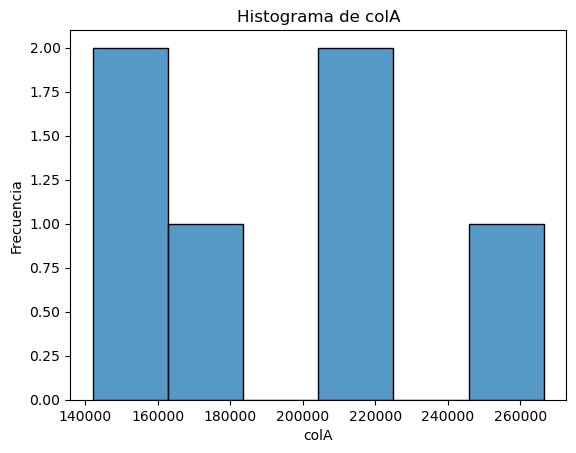

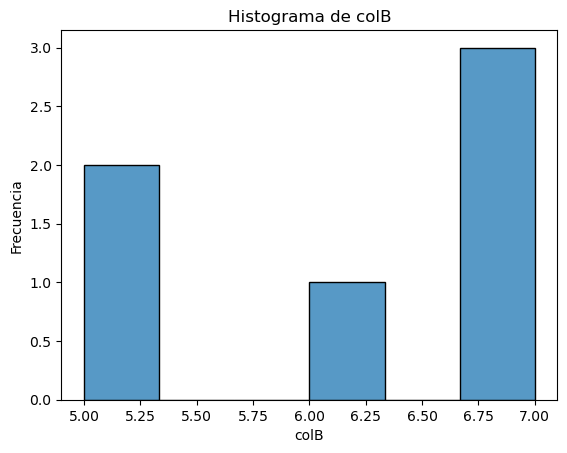

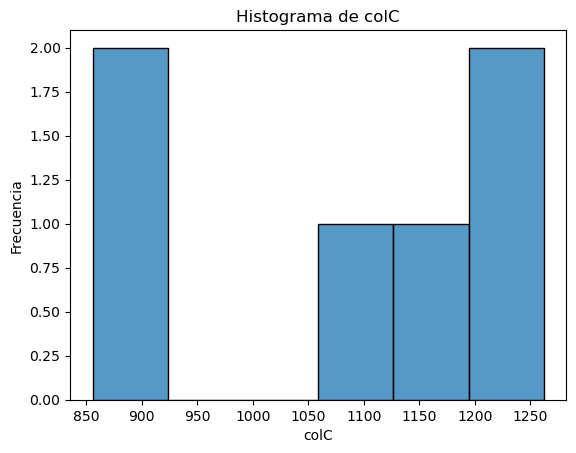

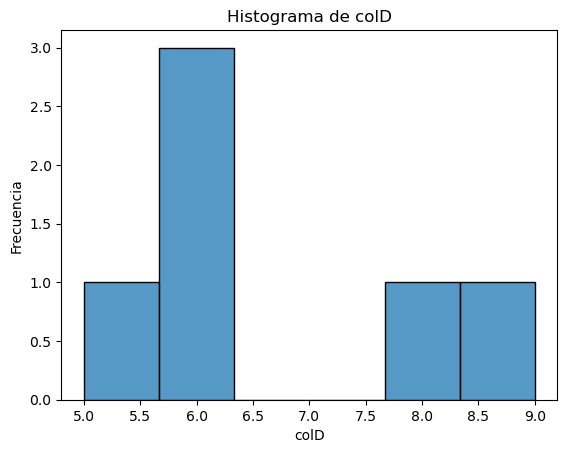

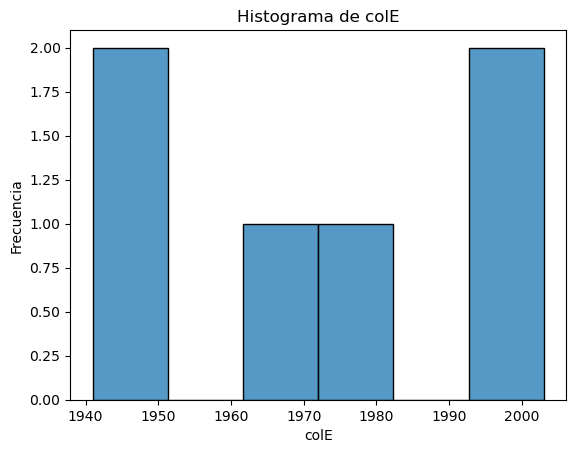

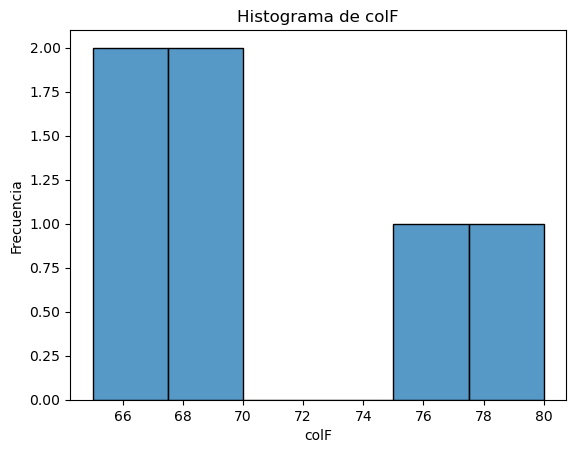

In [18]:
print(summary)
for column in df.columns:
    sns.histplot(df[column], kde=False, bins=6) 
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

### 5. Para cada variable independiente x :Calcular el coeficiente de correlaci´on entre x y y.Graficar x vs y(scatterplot) usando matplotlib.
Colocar el coeficiente de correlaci´on y colocarlo como parte del t´ıtulo de la gr´afica.
Basado en la gr´afica y el coeficiente de correlaci´on de cada par x,y elegir las 2 variables
con m´as potencial predictivo es decir las 2 variables que presentan mayor correlaci´on
entre dicha variable y la variable dependiente.

In [19]:
df.head()

,colA,colB,colC,colD,colE,colF
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,266500.0,7.0,1188.0,9.0,1941.0,66.0
4,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [20]:
x = df.loc[:,["colA", "colC", "colE"]]
y = df.loc[:,["colB", "colD", "colF"]]
y.head()

,colB,colD,colF
0,7.0,8.0,65.0
1,6.0,6.0,80.0
2,7.0,6.0,68.0
3,7.0,9.0,66.0
4,5.0,5.0,68.0


In [21]:
x = df.loc[:,["colA", "colC", "colE"]]
y = df.loc[:,["colB", "colD", "colF"]]
x.head()

,colA,colC,colE
0,208500.0,856.0,2003.0
1,181500.0,1262.0,1976.0
2,223500.0,920.0,2001.0
3,266500.0,1188.0,1941.0
4,142125.0,1078.0,1950.0


In [22]:
correlations = {}
labels = {}

In [23]:
y.head()

,colB,colD,colF
0,7.0,8.0,65.0
1,6.0,6.0,80.0
2,7.0,6.0,68.0
3,7.0,9.0,66.0
4,5.0,5.0,68.0


In [24]:
x = df.loc[:,["colA", "colC", "colE"]]
y = df.loc[:,["colB", "colD", "colF"]]
x.head()

,colA,colC,colE
0,208500.0,856.0,2003.0
1,181500.0,1262.0,1976.0
2,223500.0,920.0,2001.0
3,266500.0,1188.0,1941.0
4,142125.0,1078.0,1950.0


In [25]:
np.corrcoef(x,y)

array([[ 1.        ,  0.99999908,  0.99999983,  0.99999727,  0.99999984,
         0.99999983, -0.50886165, -0.49583991, -0.48356321, -0.52154081,
        -0.49583991, -0.50662171],
       [ 0.99999908,  1.        ,  0.9999997 ,  0.99999952,  0.99999813,
         0.9999997 , -0.51003154, -0.4970201 , -0.48475278, -0.52270032,
        -0.4970201 , -0.50779339],
       [ 0.99999983,  0.9999997 ,  1.        ,  0.99999846,  0.99999933,
         1.        , -0.50936155, -0.49634421, -0.48407152, -0.52203628,
        -0.49634421, -0.50712238],
       [ 0.99999727,  0.99999952,  0.99999846,  1.        ,  0.99999577,
         0.99999847, -0.51087088, -0.49786684, -0.48560628, -0.52353219,
        -0.49786684, -0.50863402],
       [ 0.99999984,  0.99999813,  0.99999933,  0.99999577,  1.        ,
         0.99999933, -0.5083678 , -0.49534173, -0.48306108, -0.52105133,
        -0.49534173, -0.50612711],
       [ 0.99999983,  0.9999997 ,  1.        ,  0.99999847,  0.99999933,
         1.        , -

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


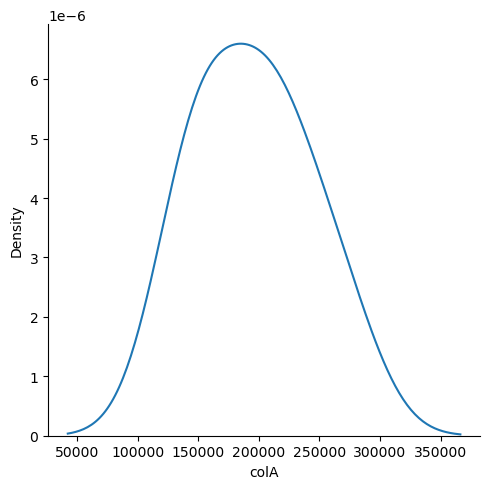

In [26]:
sns.displot (df, x= 'colA', kind = 'kde')
plt.show()

In [27]:
x.head()

,colA,colC,colE
0,208500.0,856.0,2003.0
1,181500.0,1262.0,1976.0
2,223500.0,920.0,2001.0
3,266500.0,1188.0,1941.0
4,142125.0,1078.0,1950.0


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


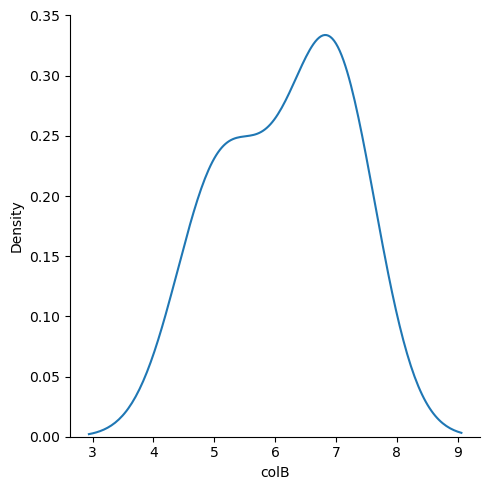

In [28]:
sns.displot (df, x= 'colB', kind = 'kde')
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


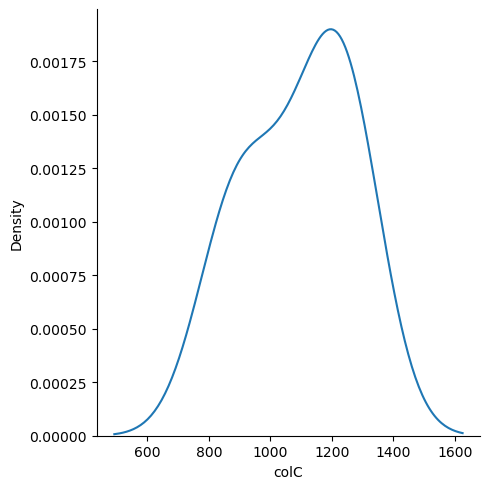

In [29]:
sns.displot (df, x= 'colC', kind = 'kde')
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


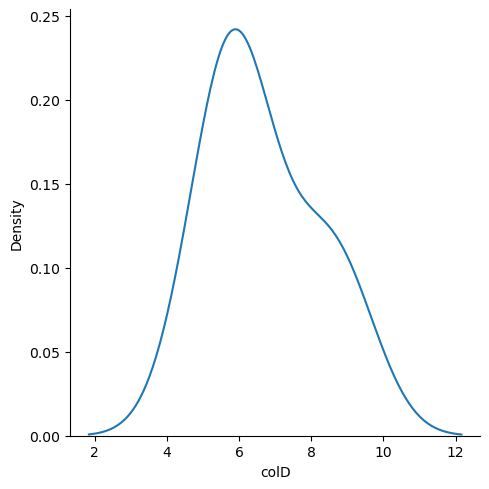

In [30]:
sns.displot (df, x= 'colD', kind = 'kde')
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


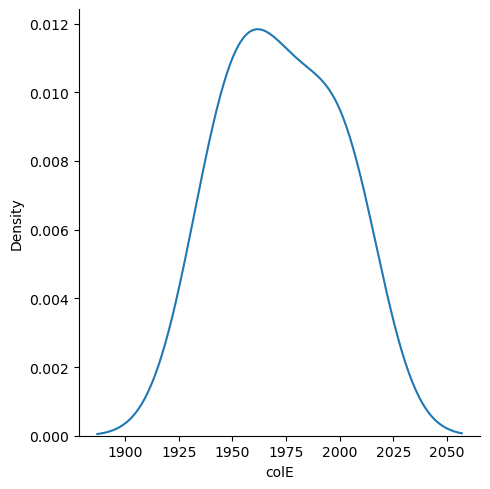

In [31]:
sns.displot (df, x= 'colE', kind = 'kde')
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


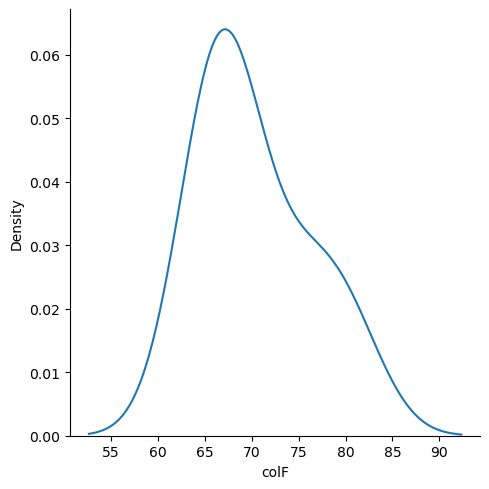

In [32]:
sns.displot (df, x= 'colF', kind = 'kde')
plt.show()

### 6. Crear una funci´on para entrenar un modelo de regresi´on lineal de una variable y = β0 +β1 ∗x.La funci´on recibe como argumentos:
6.1 Vector con la variable independiente x,
6.2 Vector con la variable dependiente y,
6.3 un entero epochs que indica por cuantas iteraciones entrenar el modelo.
6.4 un entero imprimir error cada , que nos indica cada cuantas iteraciones queremos
imprimir a trav´es de print: el nu´mero de iteraci´on, el error del modelo en esa iteraci´on, si imprimir error cada = 10, se despliega en pantalla el error en las iteraciones:
10,20,30,40,50.
6.5 escalar α(learning rate): es usado como parte de la expresi´on matem´atica para actualizar
en cada iteraci´on los par´ametros del modelo.

In [38]:
def entrenar_regresion_lineal(x, y, epochs, imprimir_error_cada, alpha):    
    np.random.seed(0)
    beta0 = np.random.rand()
    beta1 = np.random.rand()
   
    m = len(x)
    
    for epoch in range(epochs):       
        y_pred = beta0 + beta1 * x
                
        error = np.mean((y_pred - y)**2)        
        
        gradiente_beta0 = (2/m) * np.sum(y_pred - y)
        gradiente_beta1 = (2/m) * np.sum((y_pred - y) * x)
        
        beta0 -= alpha * gradiente_beta0
        beta1 -= alpha * gradiente_beta1        
        
        if epoch % imprimir_error_cada == 0:
            print(f"Iteración: {epoch}, Error: {error}")
    
    return beta0, beta1

# Ejemplo de uso
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 4, 6])
epochs = 100
imprimir_error_cada = 10
alpha = 0.01

beta0, beta1 = entrenar_regresion_lineal(x, y, epochs, imprimir_error_cada, alpha)
print(f"Coeficientes del modelo: beta0 = {beta0}, beta1 = {beta1}")


Iteración: 0, Error: 2.152949339072088
Iteración: 10, Error: 0.45955295446877215
Iteración: 20, Error: 0.4472187605678332
Iteración: 30, Error: 0.44278437173487006
Iteración: 40, Error: 0.4386724275368434
Iteración: 50, Error: 0.4348299225470248
Iteración: 60, Error: 0.43123906694409786
Iteración: 70, Error: 0.42788337935734366
Iteración: 80, Error: 0.42474745844184464
Iteración: 90, Error: 0.4218169115020392
Coeficientes del modelo: beta0 = 0.836647831558124, beta1 = 1.0283411207817468


In [34]:
def entrenar_regresion_lineal(x, y, epochs, imprimir_error_cada, alpha):
    # Inicializar parámetros
    beta0 = 0
    beta1 = 0
    n = len(y)
    
    # Entrenamiento del modelo
    for epoch in range(epochs):
        # Calcular predicciones
        y_pred = beta0 + beta1 * x
        
        # Calcular error
        error = np.mean((y_pred - y) ** 2)
        
        # Actualizar parámetros (descenso de gradiente)
        gradient_beta0 = (2/n) * np.sum(y_pred - y)
        gradient_beta1 = (2/n) * np.sum((y_pred - y) * x)
        beta0 -= alpha * gradient_beta0
        beta1 -= alpha * gradient_beta1
        
        # Imprimir error cada cierto número de iteraciones
        if (epoch + 1) % imprimir_error_cada == 0:
            print(f"Iteración {epoch + 1}, Error: {error}")
    
    return beta0, beta1

# Ejemplo de uso
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

epochs = 100
imprimir_error_cada = 10
alpha = 0.01

beta0, beta1 = entrenar_regresion_lineal(x, y, epochs, imprimir_error_cada, alpha)
print("Parámetros finales del modelo:")
print("beta0:", beta0)
print("beta1:", beta1)


Iteración 10, Error: 1.215576059220508
Iteración 20, Error: 1.051563614023817
Iteración 30, Error: 1.0136082383150382
Iteración 40, Error: 0.9786594436066594
Iteración 50, Error: 0.9460018260570994
Iteración 60, Error: 0.9154829926974892
Iteración 70, Error: 0.8869628622580088
Iteración 80, Error: 0.8603105380337268
Iteración 90, Error: 0.8354036958974536
Iteración 100, Error: 0.812128022827409
Parámetros finales del modelo:
beta0: 0.8537510676872087
beta1: 0.9728893670773188


In [39]:
import numpy as np

def entrenar_regresion_lineal(x, y, epochs, imprimir_error_cada, alpha):
    # Crear una matriz de características con una columna de unos para el término de sesgo
    X = np.column_stack((x, np.ones_like(x)))
    
    # Inicializar parámetros
    beta = np.zeros(2)  # Inicialización de los parámetros beta0 y beta1
    
    # Función para calcular las predicciones
    def calcular_predicciones(X, beta):
        return np.dot(X, beta)
    
    # Función para calcular el error
    def calcular_error(y, y_pred):
        return np.mean((y_pred - y) ** 2)
    
    # Entrenamiento del modelo
    for epoch in range(epochs):
        # Calcular predicciones
        y_pred = calcular_predicciones(X, beta)
        
        # Calcular error
        error = calcular_error(y, y_pred)
        
        # Actualizar parámetros (descenso de gradiente)
        gradient = (2/len(y)) * np.dot(X.T, y_pred - y)
        beta -= alpha * gradient
        
        # Imprimir error cada cierto número de iteraciones
        if (epoch + 1) % imprimir_error_cada == 0:
            print(f"Iteración {epoch + 1}, Error: {error}")
    
    return beta[0], beta[1]  # Retorna los parámetros beta0 y beta1 del modelo

# Ejemplo de uso
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

epochs = 100
imprimir_error_cada = 10
alpha = 0.01

beta0, beta1 = entrenar_regresion_lineal(x, y, epochs, imprimir_error_cada, alpha)
print("Parámetros finales del modelo:")
print("beta0:", beta0)
print("beta1:", beta1)


Iteración 10, Error: 1.215576059220508
Iteración 20, Error: 1.051563614023817
Iteración 30, Error: 1.0136082383150382
Iteración 40, Error: 0.9786594436066594
Iteración 50, Error: 0.9460018260570994
Iteración 60, Error: 0.9154829926974892
Iteración 70, Error: 0.8869628622580088
Iteración 80, Error: 0.8603105380337268
Iteración 90, Error: 0.8354036958974536
Iteración 100, Error: 0.812128022827409
Parámetros finales del modelo:
beta0: 0.9728893670773188
beta1: 0.8537510676872087


In [40]:
import numpy as np

def entrenar_regresion_lineal(x, y, epochs, imprimir_error_cada, alpha):
    # Crear una matriz de características con una columna de unos para el término de sesgo
    X = np.column_stack((x, np.ones_like(x)))
    
    # Inicializar parámetros
    beta = np.zeros(2)  # Inicialización de los parámetros beta0 y beta1
    
    # Función para calcular las predicciones
    def calcular_predicciones(X, beta):
        return np.dot(X, beta)
    
    # Función para calcular el error
    def calcular_error(y, y_pred):
        return np.mean((y_pred - y) ** 2)
    
    # Entrenamiento del modelo
    for epoch in range(epochs):
        # Calcular predicciones
        y_pred = calcular_predicciones(X, beta)
        
        # Calcular error
        error = calcular_error(y, y_pred)
        
        # Actualizar parámetros (descenso de gradiente)
        gradient = (2/len(y)) * np.dot(X.T, y_pred - y)
        beta -= alpha * gradient
        
        # Imprimir error cada cierto número de iteraciones
        if (epoch + 1) % imprimir_error_cada == 0:
            print(f"Iteración {epoch + 1}, Error: {error}")
    
    return beta[0], beta[1]  # Retorna los parámetros beta0 y beta1 del modelo

# Ejemplo de uso
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

epochs = 100
imprimir_error_cada = 10
alpha = 0.01

beta0, beta1 = entrenar_regresion_lineal(x, y, epochs, imprimir_error_cada, alpha)
print("Parámetros finales del modelo:")
print("beta0:", beta0)
print("beta1:", beta1)


Iteración 10, Error: 1.215576059220508
Iteración 20, Error: 1.051563614023817
Iteración 30, Error: 1.0136082383150382
Iteración 40, Error: 0.9786594436066594
Iteración 50, Error: 0.9460018260570994
Iteración 60, Error: 0.9154829926974892
Iteración 70, Error: 0.8869628622580088
Iteración 80, Error: 0.8603105380337268
Iteración 90, Error: 0.8354036958974536
Iteración 100, Error: 0.812128022827409
Parámetros finales del modelo:
beta0: 0.9728893670773188
beta1: 0.8537510676872087


In [41]:
import numpy as np

def entrenar_regresion_lineal(x, y, epochs, imprimir_error_cada, alpha):
    # Crear una matriz de características con una columna de unos para el término de sesgo
    X = np.column_stack((x, np.ones_like(x)))
    
    # Inicializar parámetros
    beta = np.zeros(2)  # Inicialización de los parámetros beta0 y beta1
    
    # Función para calcular las predicciones
    def calcular_predicciones(X, beta):
        return np.dot(X, beta)
    
    # Función para calcular el error
    def calcular_error(y, y_pred):
        return np.mean((y_pred - y) ** 2)
    
    # Entrenamiento del modelo
    for epoch in range(epochs):
        # Calcular predicciones
        y_pred = calcular_predicciones(X, beta)
        
        # Calcular error
        error = calcular_error(y, y_pred)
        
        # Actualizar parámetros (descenso de gradiente)
        gradient = (2/len(y)) * np.dot(X.T, y_pred - y)
        beta -= alpha * gradient
        
        # Imprimir error cada cierto número de iteraciones
        if (epoch + 1) % imprimir_error_cada == 0:
            print(f"Iteración {epoch + 1}, Error: {error}")
    
    return beta[0], beta[1], error  # Retorna los parámetros beta0 y beta1 del modelo y el error final

# Ejemplo de uso
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

epochs = 100
imprimir_error_cada = 10
alpha = 0.01

beta0, beta1, error_final = entrenar_regresion_lineal(x, y, epochs, imprimir_error_cada, alpha)
print("Parámetros finales del modelo:")
print("beta0:", beta0)
print("beta1:", beta1)
print("Error final del modelo:", error_final)



Iteración 10, Error: 1.215576059220508
Iteración 20, Error: 1.051563614023817
Iteración 30, Error: 1.0136082383150382
Iteración 40, Error: 0.9786594436066594
Iteración 50, Error: 0.9460018260570994
Iteración 60, Error: 0.9154829926974892
Iteración 70, Error: 0.8869628622580088
Iteración 80, Error: 0.8603105380337268
Iteración 90, Error: 0.8354036958974536
Iteración 100, Error: 0.812128022827409
Parámetros finales del modelo:
beta0: 0.9728893670773188
beta1: 0.8537510676872087
Error final del modelo: 0.812128022827409


In [42]:
import numpy as np

def entrenar_regresion_lineal(x, y, epochs, imprimir_error_cada, alpha):
    # Crear una matriz de características con una columna de unos para el término de sesgo
    X = np.column_stack((x, np.ones_like(x)))
    
    # Inicializar parámetros
    beta = np.zeros(2)  # Inicialización de los parámetros beta0 y beta1
    
    # Lista para almacenar los errores de cada iteración
    errores_iteracion = []
    
    # Función para calcular las predicciones
    def calcular_predicciones(X, beta):
        return np.dot(X, beta)
    
    # Función para calcular el error
    def calcular_error(y, y_pred):
        return np.mean((y_pred - y) ** 2)
    
    # Función para calcular el gradiente del error respecto de los parámetros
    def calcular_gradiente_error(X, y, y_pred):
        gradiente = np.mean((y_pred - y) * X.T, axis=1)
        return gradiente
    
    # Entrenamiento del modelo
    for epoch in range(epochs):
        # Calcular predicciones
        y_pred = calcular_predicciones(X, beta)
        
        # Calcular error
        error = calcular_error(y, y_pred)
        errores_iteracion.append(error)
        
        # Calcular gradientes del error respecto de los parámetros
        gradient = calcular_gradiente_error(X, y, y_pred)
        
        # Actualizar parámetros (descenso de gradiente)
        beta -= alpha * gradient
        
        # Imprimir error cada cierto número de iteraciones
        if (epoch + 1) % imprimir_error_cada == 0:
            print(f"Iteración {epoch + 1}, Error: {error}")
    
    return beta[0], beta[1], errores_iteracion  # Retorna los parámetros beta0 y beta1 del modelo y los errores de cada iteración

# Ejemplo de uso
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

epochs = 100
imprimir_error_cada = 10
alpha = 0.01

beta0, beta1, errores_iteracion = entrenar_regresion_lineal(x, y, epochs, imprimir_error_cada, alpha)
print("Parámetros finales del modelo:")
print("beta0:", beta0)
print("beta1:", beta1)
print("Errores de cada iteración:", errores_iteracion)


Iteración 10, Error: 2.7761249768907525
Iteración 20, Error: 1.223274838618386
Iteración 30, Error: 1.0795456693732042
Iteración 40, Error: 1.0500064719467916
Iteración 50, Error: 1.030268131086074
Iteración 60, Error: 1.0118972398514887
Iteración 70, Error: 0.9941948690302469
Iteración 80, Error: 0.9770861104257224
Iteración 90, Error: 0.9605469686102989
Iteración 100, Error: 0.944558149112695
Parámetros finales del modelo:
beta0: 1.0417530517794173
beta1: 0.6051164658853391
Errores de cada iteración: [17.2, 13.620144000000002, 10.8367613472, 8.67254126003904, 6.989646213772907, 5.680924329233724, 4.6630780762617885, 3.8713537733289543, 3.255413320822467, 2.7761249768907525, 2.4030685768538143, 2.1125961453976023, 1.8863242589579574, 1.7099620412484882, 1.572400072645652, 1.4650021282935566, 1.381054590814402, 1.3153384358049747, 1.2637965027332017, 1.223274838618386, 1.191321624271604, 1.1660308639575603, 1.145920873160173, 1.1298398176320643, 1.1168922815198568, 1.1063821830325566, 

In [43]:
import numpy as np

def entrenar_regresion_lineal(x, y, epochs, imprimir_error_cada, alpha):
    # Crear una matriz de características con una columna de unos para el término de sesgo
    X = np.column_stack((x, np.ones_like(x)))
    
    # Inicializar parámetros
    beta = np.zeros(2)  # Inicialización de los parámetros beta0 y beta1
    
    # Lista para almacenar los errores de cada iteración
    errores_iteracion = []
    
    # Estructura de datos para almacenar el modelo resultante de cada iteración
    modelo_iteracion = {}
    
    # Función para calcular las predicciones
    def calcular_predicciones(X, beta):
        return np.dot(X, beta)
    
    # Función para calcular el error
    def calcular_error(y, y_pred):
        return np.mean((y_pred - y) ** 2)
    
    # Función para calcular el gradiente del error respecto de los parámetros
    def calcular_gradiente_error(X, y, y_pred):
        gradiente = np.mean((y_pred - y) * X.T, axis=1)
        return gradiente
    
    # Entrenamiento del modelo
    for epoch in range(epochs):
        # Calcular predicciones
        y_pred = calcular_predicciones(X, beta)
        
        # Calcular error
        error = calcular_error(y, y_pred)
        errores_iteracion.append(error)
        
        # Calcular gradientes del error respecto de los parámetros
        gradient = calcular_gradiente_error(X, y, y_pred)
        
        # Actualizar parámetros (descenso de gradiente)
        beta -= alpha * gradient
        
        # Almacenar modelo de la iteración
        modelo_iteracion[epoch] = beta.copy()  # Usamos copy para almacenar una copia independiente de los parámetros
        
        # Imprimir error cada cierto número de iteraciones
        if (epoch + 1) % imprimir_error_cada == 0:
            print(f"Iteración {epoch + 1}, Error: {error}")
    
    return modelo_iteracion, errores_iteracion  # Retorna el modelo de cada iteración y los errores de cada iteración

# Ejemplo de uso
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

epochs = 100
imprimir_error_cada = 10
alpha = 0.01

modelo_iteracion, errores_iteracion = entrenar_regresion_lineal(x, y, epochs, imprimir_error_cada, alpha)
print("Modelo resultante de cada iteración:")
for epoch, modelo in modelo_iteracion.items():
    print(f"Iteración {epoch + 1}: beta0={modelo[0]}, beta1={modelo[1]}")
print("Errores de cada iteración:", errores_iteracion)


Iteración 10, Error: 2.7761249768907525
Iteración 20, Error: 1.223274838618386
Iteración 30, Error: 1.0795456693732042
Iteración 40, Error: 1.0500064719467916
Iteración 50, Error: 1.030268131086074
Iteración 60, Error: 1.0118972398514887
Iteración 70, Error: 0.9941948690302469
Iteración 80, Error: 0.9770861104257224
Iteración 90, Error: 0.9605469686102989
Iteración 100, Error: 0.944558149112695
Modelo resultante de cada iteración:
Iteración 1: beta0=0.132, beta1=0.04
Iteración 2: beta0=0.24828, beta1=0.07564
Iteración 3: beta0=0.3507, beta1=0.1074352
Iteración 4: beta0=0.440899944, beta1=0.13583984799999999
Iteración 5: beta0=0.52032575472, beta1=0.16125445119999998
Iteración 6: beta0=0.5902522881648, beta1=0.18403213404639998
Iteración 7: beta0=0.65180357244528, beta1=0.20448424406099197
Iteración 8: beta0=0.7059706521544694, beta1=0.22288529444702365
Iteración 9: beta0=0.7536273215840671, beta1=0.23947732193791935
Iteración 10: beta0=0.7955439965516822, beta1=0.2544737290710181
Itera

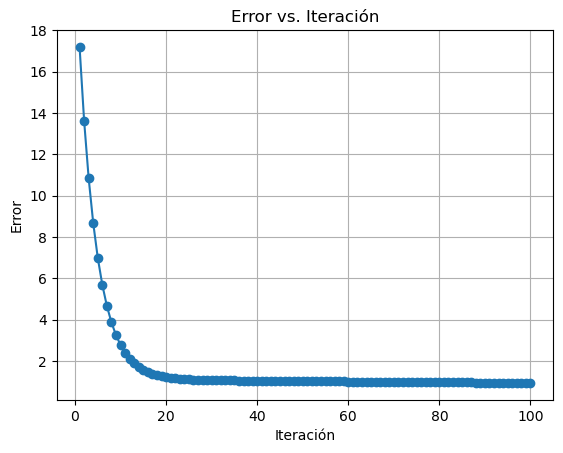

In [44]:
import matplotlib.pyplot as plt

def graficar_error_vs_iteracion(errores):
    plt.plot(range(1, len(errores) + 1), errores, marker='o')
    plt.title("Error vs. Iteración")
    plt.xlabel("Iteración")
    plt.ylabel("Error")
    plt.grid(True)
    plt.show()

def graficar_modelos_evolutivos(modelos, intervalo_iteraciones):
    for iteracion, modelo in modelos.items():
        if (iteracion + 1) % intervalo_iteraciones == 0 or iteracion == len(modelos) - 1:
            beta0, beta1 = modelo
            plt.scatter(x, y, label='Datos')
            plt.plot(x, beta0 * x + beta1, color='red', label=f'Modelo (Iteración {iteracion + 1})')
            plt.title(f"Modelo (Iteración {iteracion + 1})")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.legend()
            plt.grid(True)
            plt.show()

# Ejemplo de uso
# Suponiendo que tienes los errores y los modelos de cada iteración almacenados en variables:
# errores_iteracion y modelo_iteracion respectivamente

# Graficar cómo cambia el error en el tiempo
graficar_error_vs_iteracion(errores_iteracion)

# Graficar cómo evoluciona el modelo entrenado en el tiempo
# Suponiendo que 'modelo_iteracion' es un diccionario donde la clave es el número de iteración y el valor es el modelo correspondiente
# Suponiendo que 'intervalo_iteraciones' es el número de iteraciones entre cada gráfico del modelo
# Suponiendo que 'x' y 'y' son los datos de entrenamiento
# Por ejemplo, si quieres graficar el modelo cada 5 iteraciones:
# graficar_modelos_evolutivos(modelo_iteracion, intervalo_iteraciones=5)


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def combinar_predicciones(modelo_manual, modelo_scikit, x):
    # Predicciones con el modelo entrenado manualmente
    pred_manual = modelo_manual[0] * x + modelo_manual[1]
    
    # Predicciones con el modelo de scikit-learn
    pred_scikit = modelo_scikit.predict(x.reshape(-1, 1))
    
    # Combinación de las predicciones (promedio)
    pred_promedio = (pred_manual + pred_scikit) / 2
    
    return pred_manual, pred_scikit, pred_promedio

def calcular_error(predicciones, y):
    error = np.mean((predicciones - y) ** 2)
    return error

def graficar_error(x, errores_manual, errores_scikit):
    plt.plot(x, errores_manual, label='Error (Modelo Manual)')
    plt.plot(x, errores_scikit, label='Error (Modelo Scikit)')
    plt.title("Error de los Modelos")
    plt.xlabel("x")
    plt.ylabel("Error")
    plt.legend()
    plt.grid(True)
    plt.show()

# Suponiendo que 'x_validacion' y 'y_validacion' son los datos de validación
def comparar_modelos(x_validacion, y_validacion, modelo_manual, modelo_scikit):
    # Predicciones combinadas
    pred_manual, pred_scikit, pred_promedio = combinar_predicciones(modelo_manual, modelo_scikit, x_validacion)
    
    # Calcular errores
    error_manual = calcular_error(pred_manual, y_validacion)
    error_scikit = calcular_error(pred_scikit, y_validacion)
    error_promedio = calcular_error(pred_promedio, y_validacion)
    
    # Graficar errores
    graficar_error(x_validacion, error_manual, error_scikit)
    
    # Comparar errores y concluir cuál modelo es mejor
    if error_manual < error_scikit:
        print("El modelo entrenado manualmente tiene un error más bajo.")
    elif error_manual > error_scikit:
        print("El modelo de scikit-learn tiene un error más bajo.")
    else:
        print("Ambos modelos tienen el mismo error.")

# Ejemplo de uso
# Suponiendo que 'x_validacion' y 'y_validacion' son los datos de validación y 'modelo_manual' y 'modelo_scikit' son los modelos entrenados manualmente y con scikit-learn, respectivamente
comparar_modelos(x_validacion, y_validacion, modelo_manual, modelo_scikit)


NameError: name 'x_validacion' is not defined